In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import sys
sys.path.append("..")

In [4]:
import torch
import matplotlib.pyplot as plt
from RRL import train

In [5]:
prices = []
with open("../data/DAX.txt", "r") as fin:
    for line in fin.readlines():
        prices.append(float(line))
prices[:10], np.mean(prices), np.std(prices), len(prices)

([6444.74,
  6569.48,
  6561.47,
  6694.44,
  6710.77,
  6761.19,
  6801.32,
  6739.9,
  6704.5,
  6590.41],
 4420.459015849612,
 1916.8738317813668,
 5426)

In [6]:
OFFSET = 500
M = 5
T = 600
N = 100
results = train(torch.tensor(prices[OFFSET:OFFSET+M+T+N+1]), M, T, delta=0, lr=0.2, max_iter=200)
results["valid_reward"].detach().numpy()

array(-0.00213478, dtype=float32)

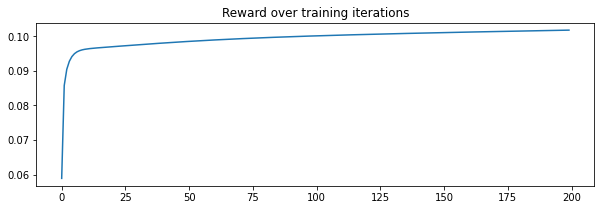

In [7]:
plt.rcParams['figure.figsize'] = [10, 3]
plt.title("Reward over training iterations")
plt.plot(results["rewards_iter"])

<BarContainer object of 599 artists>

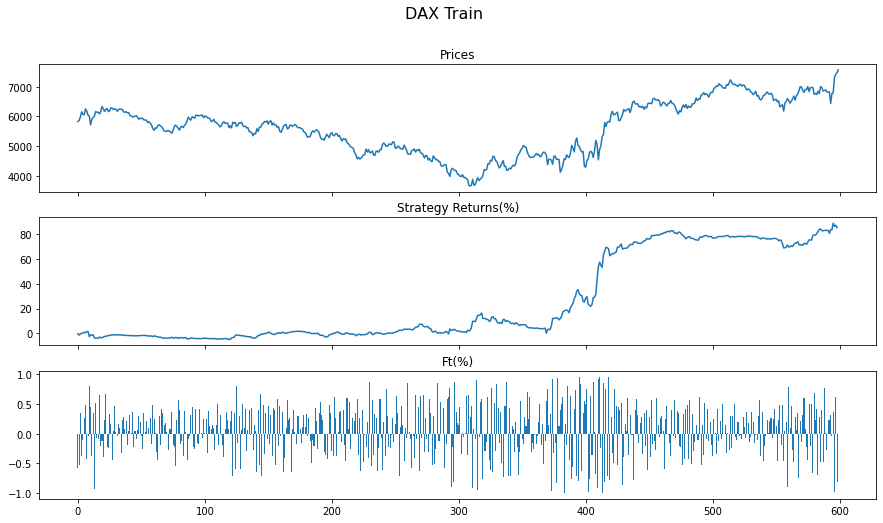

In [8]:
plt.rcParams['figure.figsize'] = [15, 8]
f, axes = plt.subplots(3, 1, sharex=True)
plt.suptitle("DAX Train", fontsize=16)
axes[0].set_title("Prices")
axes[0].plot(prices[OFFSET+M:OFFSET+M+T])
axes[1].set_title("Strategy Returns(%)")
axes[1].plot(results["train_percentage_returns"].detach().numpy())
axes[2].set_title("Ft(%)")
axes[2].bar(list(range(len(results["train_percentage_returns"]))), results["train_Ft"][:-1].detach().numpy())

<BarContainer object of 99 artists>

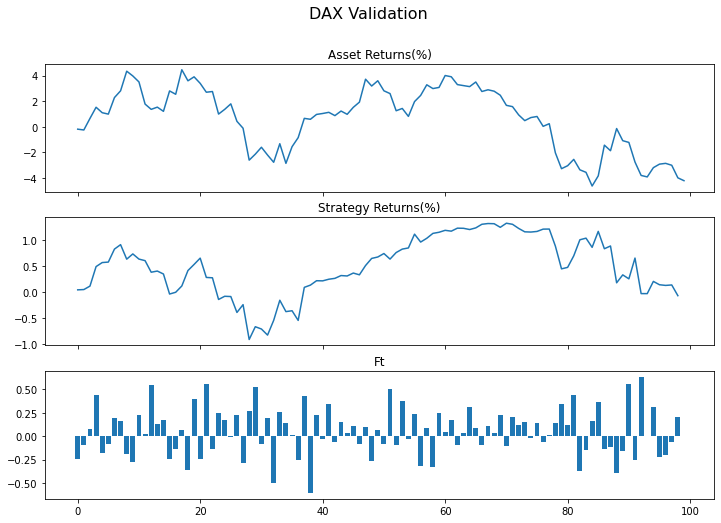

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
f, axes = plt.subplots(3, 1, sharex=True)
plt.suptitle("DAX Validation", fontsize=16)
# axes[0].set_title("Prices")
# axes[0].plot(prices[OFFSET+T+M+1:OFFSET+M+T+N+1])
axes[0].set_title("Asset Returns(%)")
axes[0].plot(results["valid_asset_percentage_returns"].detach().numpy())
axes[1].set_title("Strategy Returns(%)")
axes[1].plot(results["valid_percentage_returns"].detach().numpy())
axes[2].set_title("Ft")
axes[2].bar(list(range(len(results["valid_percentage_returns"]))), results["valid_Ft"][:-1].detach().numpy())